Import packages
(code refs: https://github.com/kpchamp/SindyAutoencoders)

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/Users/edwardmcdugald/Research/convection_patterns_wip/code/ml_experiments/find_sh')
from myPDEFIND import *
sys.path.append('/Users/edwardmcdugald/Research/convection_patterns_wip/code/numerics/')
import convection_patterns as cp

Generate data

In [4]:
cp.solveSH(50*np.pi,50*np.pi,256,256,.1,100,"SHAutoEncode_1",Rscale=.5,
           beta=.45,amplitude=.1,init_flag=1,energy=False)


time to generate solutions:  15.674891948699951


Load data and display results

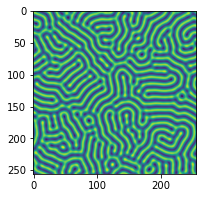

In [3]:
data = sio.loadmat("/Users/edwardmcdugald/Research/convection_patterns_wip/code/data/SHAutoEncode_1.mat")
Ufull = data['uu']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.imshow(Ufull[:,:,500].T)

Break data into train and test
https://github.com/kpchamp/SindyAutoencoders/blob/master/examples/rd/example_reactiondiffusion.py

In [8]:
x_subsample = 8
y_subsample = 8
tt = data['tt'][0][1:]
print("shape of tt: ",np.shape(tt)," first element of tt: ",tt[0])
xxfull = data['xx']
print("shape of xxfull: ",np.shape(xxfull))
yyfull = data['yy']
print("shape of yyfull: ",np.shape(yyfull))
n_samples = tt.size
print("number of samples in data set: ",n_samples)
nxfull = xxfull.size
nyfull = yyfull.size
Nfull = nxfull*nyfull
xx = xxfull[::x_subsample]
yy = yyfull[::y_subsample]
nx = xx.size
ny = yy.size
N = nx*ny
Ufull = data['uu'][:,:,1:1001]
dt = data['tt'][0][1]-data['tt'][0][0]
print("dt: ",dt)
Utfull = BackwardDiff(Ufull,data['uu'][:,:,0:1000],dt)
U = Ufull[:,:,:][::x_subsample,::y_subsample]
Ut = Utfull[:,:,:][::x_subsample,::y_subsample]
print("shape of full U data: ", np.shape(Ufull))
print("shape of spatially subsampled U data: ",np.shape(U))
training_samples = np.arange(int(.8*n_samples))
val_samples = np.arange(int(.8*n_samples), int(.9*n_samples))
test_samples = np.arange(int(.9*n_samples), n_samples)
training_data = {'tt': tt[training_samples],
                     'xx': xx.T,
                     'yy': yy.T,
                     'U': U[:,:,training_samples].reshape((N,-1)).T,
                     'Ut': Ut[:,:,training_samples].reshape((N,-1)).T}
val_data = {'tt': tt[val_samples],
                'xx': xx.T,
                'yy': yy.T,
                'U': U[:,:,val_samples].reshape((N,-1)).T,
                'Ut': Ut[:,:,val_samples].reshape((N,-1)).T}
test_data = {'tt': tt[test_samples],
                 'xx': xx.T,
                 'yy': yy.T,
                 'U': U[:,:,test_samples].reshape((N,-1)).T,
                 'Ut': Ut[:,:,test_samples].reshape((N,-1)).T}

shape of tt:  (1000,)  first element of tt:  0.1
shape of xx:  (256, 1)
shape of yy:  (256, 1)
number of samples in data set:  1000
dt:  0.1
shape of full U data:  (256, 256, 1000)
shape of spatially subsampled U data:  (32, 32, 1000)
